In [1]:
import sys 
import os

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('..\\scripts'))

from helpers import *
from torchvision import models


In [2]:
# use the raw data folder FOR NOW
data_loader = make_data_loader(get_processed_data_dir(), batch_size=9)

arch = 18

In [3]:
# Instantiate the model architecture
if arch == 18:
    model = models.resnet18(models.ResNet18_Weights.DEFAULT)
elif arch == 34:
    model = models.resnet34(models.ResNet34_Weights.DEFAULT)
elif arch == 50:
    model = models.resnet50(models.ResNet50_Weights.DEFAULT)
else:
    raise RuntimeError(f'Choose a valid ResNet architecture.')

D:\ENGINEERING\mezcal\venv\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(


In [4]:
model_fname = 'resnet18_20230113_15-11-34.pth'
model_path = os.path.join(get_models_dir(), model_fname)

In [5]:
# Load the state dictionary from a file
state_dict = torch.load(model_path, map_location='cpu')

# Load the state dictionary into the model
model.load_state_dict(state_dict)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# Now we make our interpretation
interp = ClassificationInterpretation(model, data_loader)

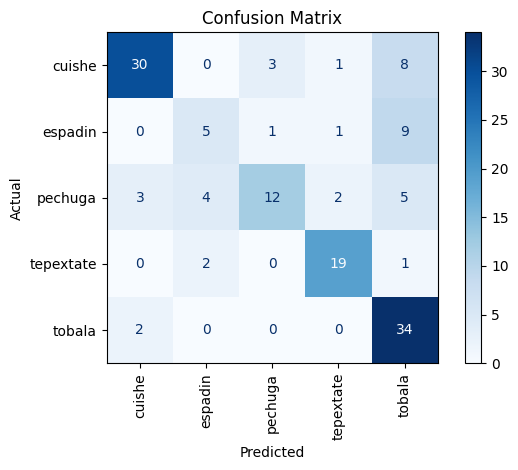

In [11]:
interp.save_confusion_matrix_plot(model_path)